In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(url)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

In [ ]:
#statistical summary
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
#checking null values
df.isnull().sum()/len(df)

,0
Product,0.0
Age,0.0
Gender,0.0
Education,0.0
MaritalStatus,0.0
Usage,0.0
Fitness,0.0
Income,0.0
Miles,0.0


In [ ]:
#Checking data type of all attributes
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [ ]:
#Value Counts
df[['Gender', 'Product', 'MaritalStatus']].value_counts()

Gender  Product  MaritalStatus
Female  KP281    Partnered        27
Male    KP281    Partnered        21
        KP481    Partnered        21
        KP281    Single           19
        KP781    Partnered        19
Female  KP481    Partnered        15
                 Single           14
Male    KP781    Single           14
Female  KP281    Single           13
Male    KP481    Single           10
Female  KP781    Partnered         4
                 Single            3
Name: count, dtype: int64

###Detecting Outliers for Age

In [ ]:
#Range
df['Age'].max() - df['Age'].min()


32

<Axes: xlabel='Age'>

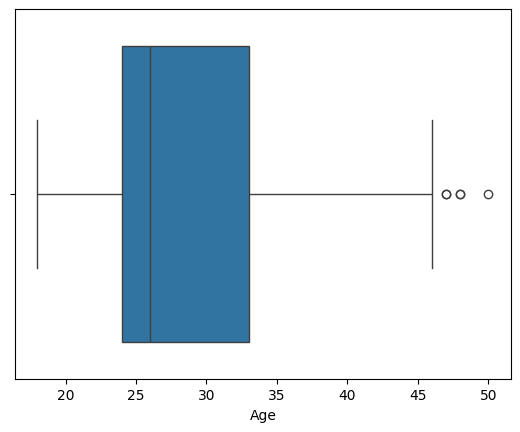

In [ ]:
sns.boxplot(df['Age'], orient='h')

In [ ]:
#IQR
iqr_age = np.percentile(df['Age'], 75) - np.percentile(df['Age'], 25)
iqr_age

9.0

In [ ]:
Right_whisker_age = np.percentile(df['Age'], 75) + 1.5 * iqr_age
Right_whisker_age

46.5

In [ ]:
#Outliers
age_outliers = df[df['Age'] > Right_whisker_age]
len(age_outliers)

5

In [ ]:
#2.77 % are outliers in Age column
5/len(df)

0.027777777777777776

###Detecting Outliers for Income

In [ ]:
#Range
df['Income'].max() - df['Income'].min()

75019

<Axes: xlabel='Income'>

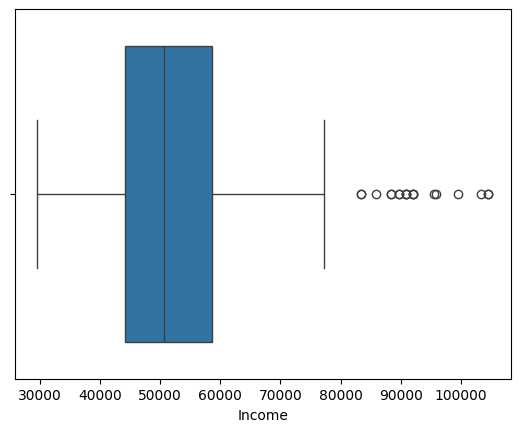

In [ ]:
sns.boxplot(df['Income'], orient='h')

In [ ]:
#IQR
iqr_income = np.percentile(df['Income'], 75) - np.percentile(df['Income'], 25)
iqr_income

14609.25

In [ ]:
Right_whisker_income = np.percentile(df['Income'], 75) + 1.5 * iqr_income
Right_whisker_income

80581.875

In [ ]:
#Outliers
income_outliers = df[df['Income'] > Right_whisker_income]
len(income_outliers)

19

In [ ]:
#10.55% are outliers in Income
19/len(df)

0.10555555555555556

###Detecting Outliers for Miles

In [ ]:
#Range
df['Miles'].max() - df['Miles'].min()

339

<Axes: xlabel='Miles'>

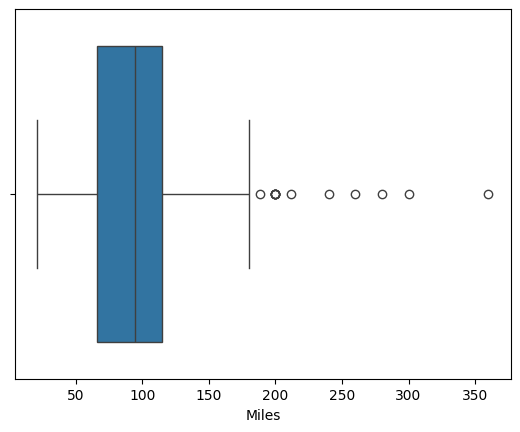

In [ ]:
sns.boxplot(df['Miles'], orient='h')


In [ ]:
#IQR
iqr_miles = np.percentile(df['Miles'], 75) - np.percentile(df['Miles'], 25)
iqr_miles

48.75

In [ ]:
rhight_whisker_miles = np.percentile(df['Miles'], 75) + 1.5 * iqr_miles
rhight_whisker_miles

187.875

In [ ]:
#Outliers
miles_outliers = df[df['Miles'] > rhight_whisker_miles]
len(miles_outliers)

13

In [ ]:
#7.22% are outliers in Miles
13/len(df)

0.07222222222222222

###Clipping the data between the 5 percentile and 95 percentile


In [ ]:
# For Income
lower_income = np.percentile(df['Income'], 5)
upper_income = np.percentile(df['Income'], 95)
df['Income'] = np.clip(df['Income'], lower_income, upper_income)
df['Income']

,Income
0,34053.15
1,34053.15
2,34053.15
3,34053.15
4,35247.00
...,...
175,83416.00
176,89641.00
177,90886.00
178,90948.25


In [ ]:
#For Age
lower_age = np.percentile(df['Age'], 5)
upper_age = np.percentile(df['Age'], 95)
df['Age'] = np.clip(df['Age'], lower_age, upper_age)
df['Age']

,Age
0,20.00
1,20.00
2,20.00
3,20.00
4,20.00
...,...
175,40.00
176,42.00
177,43.05
178,43.05


In [ ]:
#For Miles
lower_miles = np.percentile(df['Miles'], 5)
upper_miles = np.percentile(df['Miles'], 95)
df['Miles'] = np.clip(df['Miles'], lower_miles, upper_miles)
df['Miles']

,Miles
0,112
1,75
2,66
3,85
4,47
...,...
175,200
176,200
177,160
178,120


In [ ]:
#For Education
lower_education = np.percentile(df['Education'], 5)
upper_education = np.percentile(df['Education'], 95)
df['Education'] = np.clip(df['Education'], lower_education, upper_education)
df['Education']

,Education
0,14
1,15
2,14
3,14
4,14
...,...
175,18
176,18
177,16
178,18


In [ ]:
#For Usage
lower_usage = np.percentile(df['Usage'], 5)
upper_usage = np.percentile(df['Usage'], 95)
df['Usage'] = np.clip(df['Usage'], lower_usage, upper_usage)
df['Usage']

,Usage
0,3.00
1,2.00
2,4.00
3,3.00
4,4.00
...,...
175,5.05
176,5.00
177,5.00
178,4.00


In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.00,Male,14,Single,3.00,4,34053.15,112
1,KP281,20.00,Male,15,Single,2.00,3,34053.15,75
2,KP281,20.00,Female,14,Partnered,4.00,3,34053.15,66
3,KP281,20.00,Male,14,Single,3.00,3,34053.15,85
4,KP281,20.00,Male,14,Partnered,4.00,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40.00,Male,18,Single,5.05,5,83416.00,200
176,KP781,42.00,Male,18,Single,5.00,4,89641.00,200
177,KP781,43.05,Male,16,Single,5.00,5,90886.00,160
178,KP781,43.05,Male,18,Partnered,4.00,5,90948.25,120


###Checking if features like marital status, Gender, and age have any effect on the product purchased


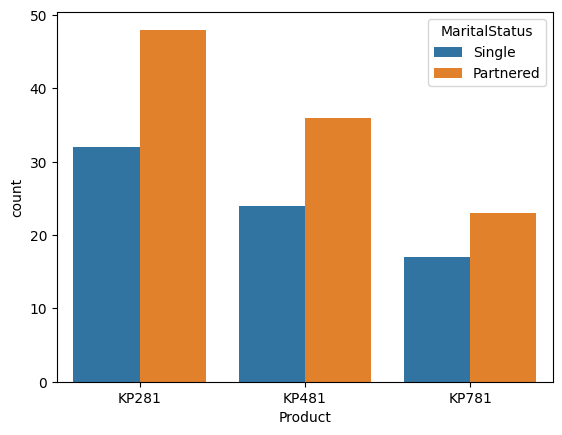

In [ ]:
#For marital status
sns.countplot(x = 'Product', hue='MaritalStatus', data=df)
plt.show()
#The count plot of marital status shows that singles have fewer purchases than those who are partnered.

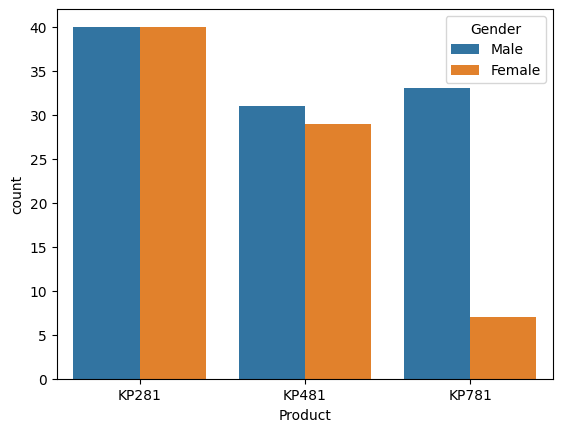

In [ ]:
#For gender
sns.countplot(x = 'Product', hue='Gender', data=df)
plt.show()
#The count plot of gender shows that females have fewer purchases than males.

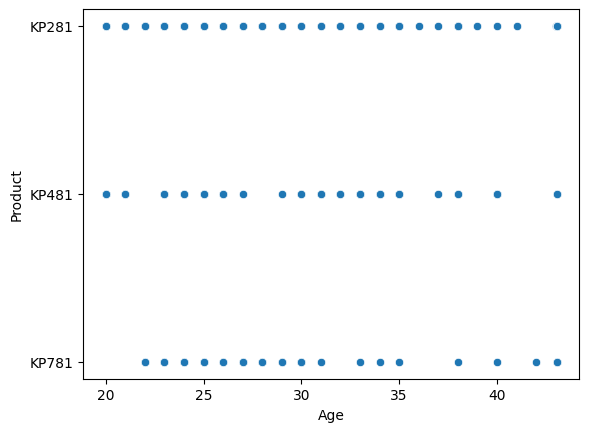

In [ ]:
#For Age
sns.scatterplot(x='Age', y='Product', data=df)
plt.show()

###Representing the Probability


In [ ]:
#Finding the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

In [ ]:
#Cross tab
product_count = pd.crosstab(index=df['Product'], columns='Count', margins = True, margins_name = 'Total')
product_count

col_0,Count,Total
Product,,
KP281,80,80
KP481,60,60
KP781,40,40
Total,180,180


In [ ]:
#calculating marginal probablity
marinal_probablity = product_count['Count']/product_count['Count']['Total']
marinal_probablity

#KP281: 44.44% of customers purchased this product.
#KP481: 33.33% of customers purchased this product.
#KP781: 22.22% of customers purchased this product.

,Count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222
Total,1.000000


####Finding the probability that the customer buys a product based on each column.

In [ ]:
#Gender
Gender_crosstab = pd.crosstab(df['Gender'], df['Product'], margins=True, margins_name='Total', normalize=True)
Gender_crosstab

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
Total,0.444444,0.333333,0.222222,1.000000


In [ ]:
#MaritalStatus
MaritalStatus_crosstab = pd.crosstab(df['MaritalStatus'], df['Product'], margins=True, margins_name='Total', normalize=True)
MaritalStatus_crosstab

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
Total,0.444444,0.333333,0.222222,1.000000


In [ ]:
#Education
Education_crosstab = pd.crosstab(df['Education'], df['Product'], margins=True, margins_name='Total', normalize=True)
Education_crosstab

Product,KP281,KP481,KP781,Total
Education,,,,
14,0.194444,0.144444,0.011111,0.350000
15,0.022222,0.005556,0.000000,0.027778
16,0.216667,0.172222,0.083333,0.472222
18,0.011111,0.011111,0.127778,0.150000
Total,0.444444,0.333333,0.222222,1.000000


In [ ]:
df['Age'].unique()

array([20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  , 27.  , 28.  ,
       29.  , 30.  , 31.  , 32.  , 33.  , 34.  , 35.  , 36.  , 37.  ,
       38.  , 39.  , 40.  , 41.  , 43.  , 43.05, 42.  ])

In [ ]:
#Age
df['Agegroup'] = pd.cut(df['Age'], bins=[15, 20, 25, 30, 35, 40, 45], labels=['15-20', '21-25', '26-30', '31-35', '36-40', '41-45'])
df['Agegroup']

Agegroup_crosstab = pd.crosstab(df['Agegroup'], df['Product'], margins=True, margins_name='Total', normalize=True)
Agegroup_crosstab

Product,KP281,KP481,KP781,Total
Agegroup,,,,
15-20,0.033333,0.022222,0.000000,0.055556
21-25,0.155556,0.133333,0.094444,0.383333
26-30,0.116667,0.038889,0.072222,0.227778
31-35,0.061111,0.094444,0.022222,0.177778
36-40,0.044444,0.033333,0.011111,0.088889
41-45,0.033333,0.011111,0.022222,0.066667
Total,0.444444,0.333333,0.222222,1.000000


In [ ]:
np.sort(df['Income'].unique())

array([34053.15, 34110.  , 35247.  , 36384.  , 37521.  , 38658.  ,
       39795.  , 40932.  , 42069.  , 43206.  , 44343.  , 45480.  ,
       46617.  , 47754.  , 48556.  , 48658.  , 48891.  , 49801.  ,
       50028.  , 51165.  , 52290.  , 52291.  , 52302.  , 53439.  ,
       53536.  , 54576.  , 54781.  , 55713.  , 56850.  , 57271.  ,
       57987.  , 58516.  , 59124.  , 60261.  , 61006.  , 61398.  ,
       62251.  , 62535.  , 64741.  , 64809.  , 65220.  , 67083.  ,
       68220.  , 69721.  , 70966.  , 74701.  , 75946.  , 77191.  ,
       83416.  , 85906.  , 88396.  , 89641.  , 90886.  , 90948.25])

In [ ]:
#Income
df['Incomegroup'] = pd.cut(df['Income'], bins=[30000, 50000, 70000, 90000, 100000], labels=['30000-50000', '50001-70000', '70001-90000', '90001-100000'])
df['Incomegroup']

Incomegroup_crosstab = pd.crosstab(df['Incomegroup'], df['Product'], margins=True, margins_name='Total', normalize=True)
Incomegroup_crosstab

Product,KP281,KP481,KP781,Total
Incomegroup,,,,
30000-50000,0.266667,0.166667,0.027778,0.461111
50001-70000,0.177778,0.166667,0.066667,0.411111
70001-90000,0.000000,0.000000,0.061111,0.061111
90001-100000,0.000000,0.000000,0.066667,0.066667
Total,0.444444,0.333333,0.222222,1.000000


In [ ]:
np.sort(df['Miles'].unique())

array([ 47,  53,  56,  64,  66,  74,  75,  80,  85,  94,  95, 100, 103,
       106, 112, 113, 120, 127, 132, 140, 141, 150, 160, 169, 170, 180,
       188, 200])

In [ ]:
#Miles
df['Milesgroup'] = pd.cut(df['Miles'], bins=[50, 100, 150, 200], labels=['50-100', '101-150', '151-200'])
df['Milesgroup']

Milesgroup_crosstab = pd.crosstab(df['Milesgroup'], df['Product'], margins=True, margins_name='Total', normalize=True)
Milesgroup_crosstab

Product,KP281,KP481,KP781,Total
Milesgroup,,,,
50-100,0.306748,0.239264,0.049080,0.595092
101-150,0.098160,0.079755,0.055215,0.233129
151-200,0.012270,0.018405,0.141104,0.171779
Total,0.417178,0.337423,0.245399,1.000000


####Finding the conditional probability that an event occurs given that another event has occurred(Example: given that a customer is female, what is the probability she’ll purchase a KP481)


In [ ]:
#The probability that a customer will purchase KP481, given that the customer is female, is 38%.

####What is the probability of a male customer buying a KP781 treadmill?

In [ ]:
#The probability that a male customer buying a KP781, is 32%.

##Checking the correlation among different factors


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    float64 
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    float64 
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    float64 
 8   Miles          180 non-null    int64   
 9   Agegroup       180 non-null    category
 10  Incomegroup    180 non-null    category
 11  Milesgroup     163 non-null    category
dtypes: category(3), float64(3), int64(3), object(3)
memory usage: 13.9+ KB


In [ ]:
#Corr function
df.select_dtypes(include=[int, float]).corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.301971,0.015394,0.059047,0.514362,0.029636
Education,0.301971,1.000000,0.413600,0.419020,0.628597,0.377294
Usage,0.015394,0.413600,1.000000,0.658169,0.481608,0.771030
Fitness,0.059047,0.419020,0.658169,1.000000,0.535945,0.822393
Income,0.514362,0.628597,0.481608,0.535945,1.000000,0.537297
Miles,0.029636,0.377294,0.771030,0.822393,0.537297,1.000000


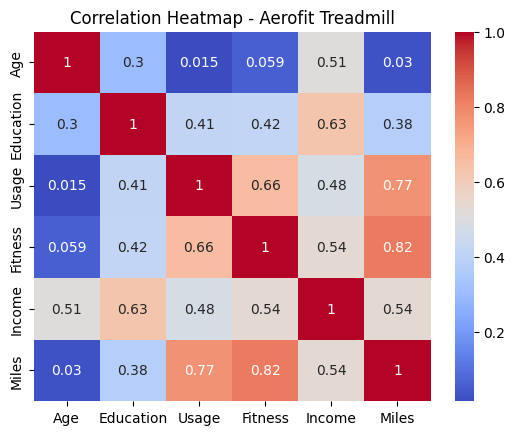

In [ ]:
#Heatmap
sns.heatmap(df.select_dtypes(include=[int, float]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Aerofit Treadmill")
plt.show()

##Customer Profiling for each Product

In [ ]:
df_KP281 = df[df['Product'] == 'KP281']
df_KP481 = df[df['Product'] == 'KP481']
df_KP781 = df[df['Product'] == 'KP781']

In [ ]:
#KP281 Profile
kp281_profile = df_KP281[['Gender', 'Age', 'Income']].reset_index().drop('index', axis=1)
kp281_profile

,Gender,Age,Income
0,Male,20.00,34053.15
1,Male,20.00,34053.15
2,Female,20.00,34053.15
3,Male,20.00,34053.15
4,Male,20.00,35247.00
...,...,...,...
75,Male,43.00,53439.00
76,Female,43.05,57987.00
77,Female,43.05,60261.00
78,Male,43.05,56850.00


In [ ]:
#KP481 Profile
kp481_profile = df_KP481[['Gender', 'Age', 'Income']].reset_index().drop('index', axis=1)
kp481_profile

,Gender,Age,Income
0,Male,20.00,34053.15
1,Male,20.00,34053.15
2,Female,20.00,34110.00
3,Male,20.00,38658.00
4,Female,21.00,34110.00
5,Male,21.00,34110.00
6,Male,21.00,34053.15
7,Male,23.00,36384.00
8,Male,23.00,38658.00
9,Female,23.00,45480.00


In [ ]:
#KP781 Profile
kp781_profile = df_KP781[['Gender', 'Age', 'Income']].reset_index().drop('index', axis=1)
kp781_profile

,Gender,Age,Income
0,Male,22.00,48658.00
1,Male,22.00,54781.00
2,Male,22.00,48556.00
3,Male,23.00,58516.00
4,Female,23.00,53536.00
5,Male,23.00,48556.00
6,Male,24.00,61006.00
7,Male,24.00,57271.00
8,Female,24.00,52291.00
9,Male,24.00,49801.00


##Business Insights & Recommendations

1. **KP281 Treadmill**
*Age Profile*:
The majority of KP281 customers are in the 18-30 age group, likely young adults with fitness goals.

Recommendation: Focus KP281 marketing on affordability, fitness features, and compact design, targeting young adults through social media and fitness influencers.


*Gender Profile*:
Male customers represent a larger proportion in this segment.

Recommendation: Target fitness enthusiasts with a focus on performance features and collaborate with male fitness influencers to boost sales for KP281.


*Income Profile*:
Customers with an income range of 30,000-50,000 appear to be the largest group buying KP281.

Recommendation: Use competitive pricing, promotions, and flexible payment plans to attract middle-income groups to the KP281.


2. **KP481 Treadmill**:
*Age Profile*:
Target the 31-40 age group with KP481, highlighting advanced features and support for home workouts.

Recommendation: Highlight KP481's advanced features, ease of use, and durability to attract professionals and those with established fitness routines in the 31-40 age group.


*Gender Profile*:
There is a relatively equal distribution between male and female customers for this product.

Recommendation: Market KP481 as a gender-neutral product, focusing on performance, health benefits, and inclusive advertising.


*Income Profile*:
Customers with incomes between 50,000 and 70,000 are the primary buyers of KP481.

Recommendation: Focus on value, durability, and versatility for KP481, with potential bundles like fitness accessories or workout app subscriptions to attract mid-to-high income customers.


3. **KP781 Treadmill**:
*Age Profile*:
Target the 41-50 age group for KP781, focusing on serious fitness enthusiasts and those seeking high-end products.

Recommendation: Market KP781 as a premium product, focusing on quality, performance, durability, and advanced features for long-term value.


*Gender Profile*:
The gender distribution is more balanced between male and female customers for KP781.

Recommendation: Promote KP781 with gender-neutral marketing, highlighting its sophisticated design and high-end features for all customers.


*Income Profile*:
Customers with an income range of 70,000-90,000 are the largest group purchasing KP781.

Recommendation: Market KP781 as a premium investment with advanced features, targeting higher-income households and professionals. Offer financing or installment plans to increase
